In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv("Medical_insurance.csv")

In [100]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [103]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

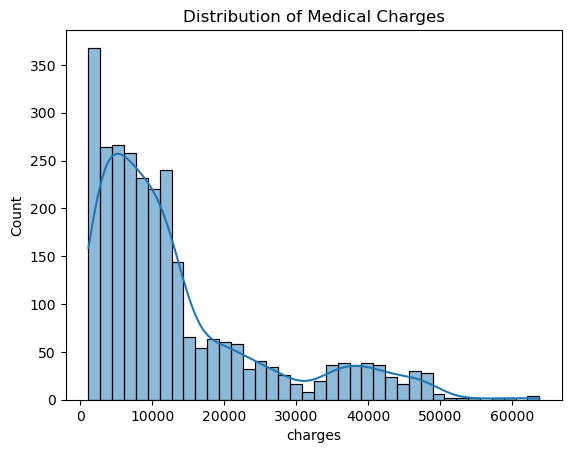

In [104]:
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Medical Charges')
plt.show()

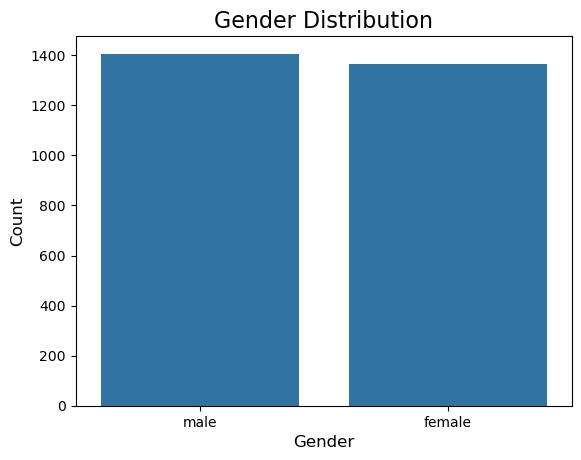

In [105]:
gender_counts = df['sex'].value_counts()

sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

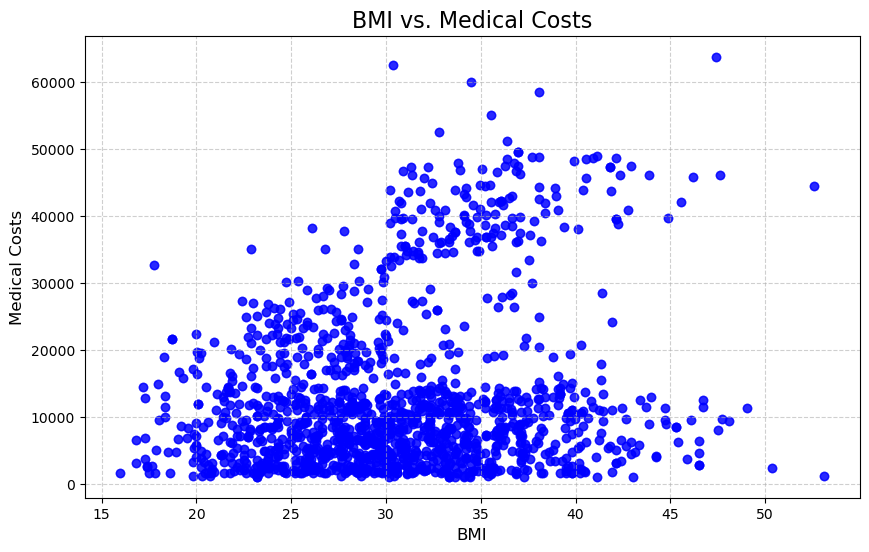

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['charges'], color='blue', alpha=0.6)
plt.title('BMI vs. Medical Costs', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Medical Costs', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\lathi\AppData\Local\Temp\ipykernel_27396\2160495453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['sex'], y=df['charges'], palette='pastel')


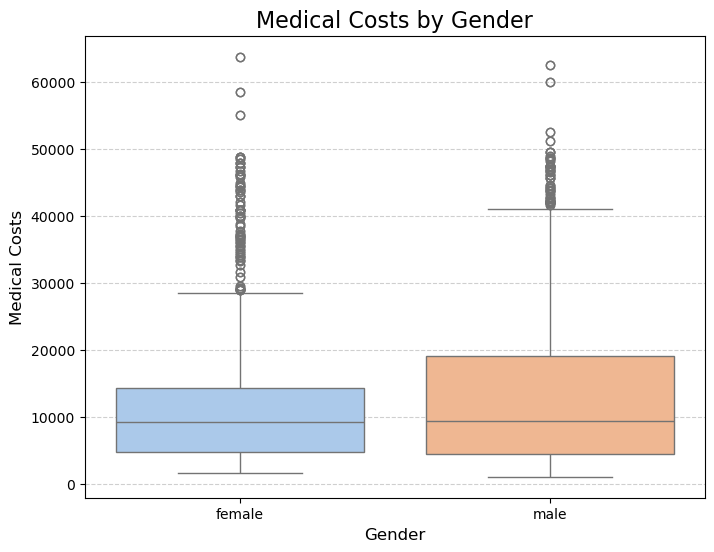

In [107]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sex'], y=df['charges'], palette='pastel')
plt.title('Medical Costs by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Medical Costs', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [108]:
high_cost_patients = df[df['charges'] > 50000]
print(high_cost_patients)

      age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
1146   60    male  32.800         0    yes  southwest  52590.82939
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309
1420   28    male  36.400         1    yes  southwest  51194.55914
1929   54  female  47.410         0    yes  southeast  63770.42801
1963   31  female  38.095         1    yes  northeast  58571.07448
2205   33  female  35.530         0    yes  northwest  55135.40209
2532   60    male  32.800         0    yes  southwest  52590.82939
2616   52    male  34.485         3    yes  northwest  60021.39897
2686   45    male  30.360         0    yes  southeast  62592.8

In [109]:
df = df.drop(df[df['charges'] > 50000].index)

In [110]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [118]:
df1=df.copy()

In [119]:
df1.drop('sex', axis=1, inplace=True)

In [120]:
df1.drop('region', axis=1, inplace=True)

In [121]:
df1[['smoker']] = df1[['smoker']].replace({'yes': 1, 'no': 0})

C:\Users\lathi\AppData\Local\Temp\ipykernel_27396\2037737282.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[['smoker']] = df1[['smoker']].replace({'yes': 1, 'no': 0})


In [122]:
df1.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


In [123]:
X = df1.drop('charges', axis=1)
y = df1['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [134]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 6831.426017374143
MSE: 77025687.44887933
R²: 0.38546051384411695


In [139]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R²_rf: {r2_rf}")

R²_rf: 0.9438919185203507


In [143]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_rf, X, y, cv=5, scoring='r2')

print(f"Cross-validation R² Scores: {cv_scores}")
print(f"Average R²: {cv_scores.mean()}")

Cross-validation R² Scores: [0.9671024  0.97987975 0.97680572 0.97010373 0.97861036]
Average R²: 0.974500392462059


In [144]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved successfully!")

Model saved successfully!


In [149]:
import json

# Assuming df1 is your DataFrame
columns = list(df1.columns)

# Define the file path where you want to save the JSON file
file_path = r'columns.json' 

with open(file_path, 'w') as file:
    json.dump(columns, file)

print(f"Column names have been saved successfully to '{file_path}'!")


TypeError: a bytes-like object is required, not 'str'